In [1]:
import matplotlib.pyplot as plt
import xarray as xr
from pathlib import Path
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
from jonnie import get_contour
import numpy as np

In [2]:
DATA=Path('/Users/jonniebarnsley/data/karthaus24/group11-project')

In [3]:
iso_path = DATA / 'isochrone_buffers/PaleoGrIS_1.0_isochrone_buffers_2km_age.nc'
model_path = DATA / 'ncfiles/variable-seasonality.nc'
file = xr.open_dataset(iso_path)
file

<xarray.Dataset>
Dimensions:    (x: 1550, y: 1550)
Coordinates:
  * x          (x) float32 -1.428e+06 -1.426e+06 ... 1.668e+06 1.67e+06
  * y          (y) float32 -3.571e+06 -3.569e+06 ... -4.75e+05 -4.73e+05
Data variables:
    mapping    |S1 ...
    isochrone  (y, x) float32 ...
    lat        (y, x) float32 ...
    lon        (y, x) float32 ...
Attributes:
    NCO:      netCDF Operators version 5.1.6 (Homepage = http://nco.sf.net, C...
    history:  history goes here

In [4]:
def get_iso_extent(time: int) -> xr.DataArray:

    iso = xr.open_dataset(iso_path)
    isochrone = iso.isochrone
    mask = xr.where(isochrone < time, np.nan, 1)
    
    da = xr.DataArray(mask, coords={'lon':iso.lon, 'lat':iso.lat})

    return da

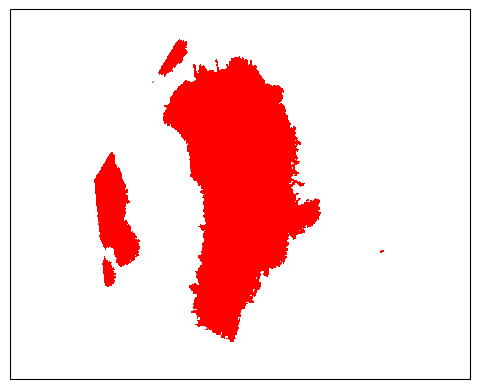

In [5]:
def plot_model(ax, model_path, time: int, color:str='red') -> None:

    model = xr.open_dataset(model_path)
    timeslice = model.sel(time=-time)
    h = timeslice.h
    mask = xr.where(h>0, 1, np.nan)

    cmap = mcolors.ListedColormap([color])
    ax.pcolormesh(model.lon, model.lat, mask, transform=ccrs.PlateCarree(), cmap=cmap)

ax = plt.axes(projection = ccrs.NorthPolarStereo(central_longitude=315))
plot_model(ax, model_path, 10000)

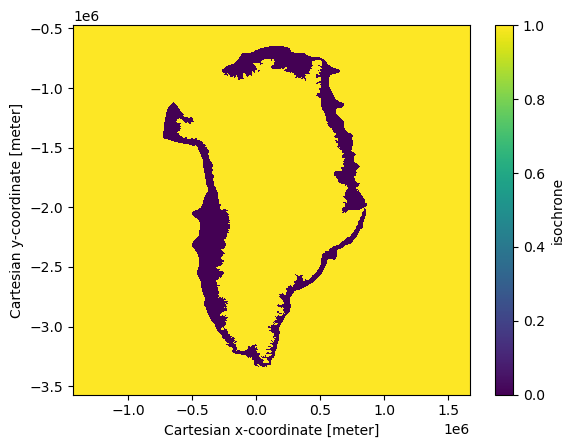

In [6]:
iso = xr.open_dataset(iso_path)
isochrone = iso.isochrone
xr.where(isochrone < 10_000, 1, 0).plot()

In [7]:
def plot_greenland_extent(ax, iso_data: xr.Dataset, time: int) -> None:

    lon = iso_data.lon
    lat = iso_data.lat 
    iso = iso_data.isochrone
    mask = xr.where(iso <= time, 1, np.nan)

    cmap = mcolors.ListedColormap(['lightgray'])
    ax.pcolormesh(lon, lat, mask, transform=ccrs.PlateCarree(), cmap=cmap)
    

In [9]:
ds = xr.open_dataset('isochrones.nc')

In [10]:
fixed = DATA / 'ncfiles/fixed-seasonality.nc'
variable = DATA / 'ncfiles/variable-seasonality.nc'

fig, axes = plt.subplots(
    nrows=2, 
    ncols=2, 
    subplot_kw={'projection': ccrs.NorthPolarStereo(central_longitude=315)},
    #dpi=250
    figsize=(10, 10)
    )

times = [14000, 12000, 10000, 8000]

for ax, time in zip(axes.flatten(), times):
    plot_greenland_extent(ax, ds, time)
    plot_model(ax, fixed, time, color='red')
    plot_model(ax, variable, time, color='blue')
    ax.set_title(time)

#plt.savefig('test.svg', format='svg')

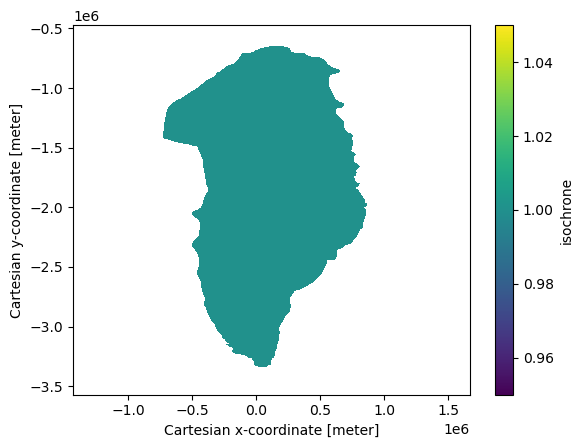

In [92]:
iso = ds.isochrone
trim = xr.where(iso<=14000, 1, np.nan)
trim.plot()